In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


**产生模拟样本（线性关系）**

In [9]:
X=np.linspace(-1,1,100)[:,np.newaxis]
#print(x)
np.random.shuffle(X)
#a=np.random.normal(0,0.05,(100,1))
#print(a)
Y=3*X+2+np.random.normal(0,0.05,(100,1))

**将生成的样本分成训练集和测试集（前70个位训练集，后30个为测试集）**

In [41]:
X_train,X_test=X[:70,:],X[70:,:]
Y_train,Y_test=Y[:70,:],Y[70:,:]

**Linear Regression by TensorFlow (GradientDescent)**

In [42]:
dim_input=1
dim_output=1
xs=tf.placeholder(tf.float32,[None,dim_input],name='x_input')
ys=tf.placeholder(tf.float32,[None,dim_output],name='y_output')
w=tf.Variable(np.random.normal(size=(1,1)),dtype=tf.float32)
b=tf.Variable(tf.zeros([1]))
prediction=tf.matmul(xs,w)+b

#loss function(prediction and real target)
# error1=tf.reduce_sum(tf.square(prediction-ys))
# error2=tf.reduce_sum(tf.square(prediction-ys),reduction_indices=[1])
# loss=tf.reduce_mean(tf.reduce_sum(tf.square(prediction-ys),reduction_indices=[1]),name='Loss')
loss=tf.reduce_mean(tf.square(prediction-ys),name='Loss')
#optimal:find the weight and bias
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)

## 一 使用SGD求解
最大学习次数为1000次，当平方误差根（Root Mean Square Error，RMSE）不再变动时（收敛），则结束训练。  
sess.run(train_step,feed_dict={xs:X_train,ys:Y_train}) 喂给模型训练集  
y_pre=sess.run(prediction,feed_dict={xs:X_test}) 测试集上的预测结果  
rmse=np.append(rmse,np.mean(np.sqrt(np.sum(np.square(Y_test-ypre))))) RMSE计算

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    rmse=[]
    for i in range(1000):
        # e1=sess.run(error1,feed_dict={xs:X_train,ys:Y_train})
        # e2=sess.run(error2,feed_dict={xs:X_train,ys:Y_train})
        #print(e1,'   ',e2)
        sess.run(train_step,feed_dict={xs:X_train,ys:Y_train})
        
        y_pre_SGD=sess.run(prediction,feed_dict={xs:X_test})
        rmse=np.append(rmse,np.sqrt(np.mean(np.sum(np.square(Y_test-y_pre_SGD)))))
        if i>=1:
            if abs(rmse[i]-rmse[i-1])<np.spacing(1):   #???
                break
        print('Iteration'+str(i+1)+': RMSE='+str(rmse[i]))
        rmse_tf=rmse[-1]
    print('\nTF (SGD) Weights:' +' '+str(sess.run(w)) + '  '+str(sess.run(b)))
    print('TF (SGD) RMSE:' + str(rmse_tf))

Iteration1: RMSE=15.323811975512076
Iteration2: RMSE=13.630949889767754
Iteration3: RMSE=12.222795031351714
Iteration4: RMSE=11.03730104197737
Iteration5: RMSE=10.026690904481873
Iteration6: RMSE=9.154421680124006
Iteration7: RMSE=8.392662149921266
Iteration8: RMSE=7.720246483352939
Iteration9: RMSE=7.121051603834936
Iteration10: RMSE=6.582737896628913
Iteration11: RMSE=6.095789379214506
Iteration12: RMSE=5.652792465972697
Iteration13: RMSE=5.2478993322112
Iteration14: RMSE=4.876432324131842
Iteration15: RMSE=4.53459385084973
Iteration16: RMSE=4.219251470341977
Iteration17: RMSE=3.9277838481589176
Iteration18: RMSE=3.657963834731595
Iteration19: RMSE=3.4078743025409413
Iteration20: RMSE=3.1758460289888837
Iteration21: RMSE=2.9604085876425046
Iteration22: RMSE=2.7602550478159475
Iteration23: RMSE=2.574216198494965
Iteration24: RMSE=2.4012372888175904
Iteration25: RMSE=2.2403618925876816
Iteration26: RMSE=2.0907207024324777
Iteration27: RMSE=1.9515171333191155
Iteration28: RMSE=1.8220227


Iteration55: RMSE=0.3960806500928709
Iteration56: RMSE=0.38407509653395133
Iteration57: RMSE=0.37336575005683376
Iteration58: RMSE=0.3638395862090609
Iteration59: RMSE=0.3553898207194304
Iteration60: RMSE=0.347915231542021
Iteration61: RMSE=0.34132087813396444
Iteration62: RMSE=0.3355179555512124
Iteration63: RMSE=0.3304239514276529
Iteration64: RMSE=0.3259635919189137
Iteration65: RMSE=0.3220665515962606
Iteration66: RMSE=0.3186694328992884
Iteration67: RMSE=0.31571469636651117
Iteration68: RMSE=0.3131497424798335
Iteration69: RMSE=0.31092818149493895
Iteration70: RMSE=0.3090074069981027
Iteration71: RMSE=0.30735067462138976
Iteration72: RMSE=0.30592427945606604
Iteration73: RMSE=0.30469878595743116
Iteration74: RMSE=0.30364839936529503
Iteration75: RMSE=0.30275001184470457
Iteration76: RMSE=0.3019832676430709
Iteration77: RMSE=0.3013310035200956
Iteration78: RMSE=0.30077748088282824
Iteration79: RMSE=0.30030933093785894
Iteration80: RMSE=0.299914586178177
Iteration81: RMSE=0.2995829


Iteration119: RMSE=0.2985293336358654
Iteration120: RMSE=0.2985395409989353
Iteration121: RMSE=0.298549123225986
Iteration122: RMSE=0.29855802631792266
Iteration123: RMSE=0.2985666717509831
Iteration124: RMSE=0.2985750164564495
Iteration125: RMSE=0.2985824586118265
Iteration126: RMSE=0.29858960721866457
Iteration127: RMSE=0.2985965866351038
Iteration128: RMSE=0.29860303580472264
Iteration129: RMSE=0.29860885108433244
Iteration130: RMSE=0.2986147020911699
Iteration131: RMSE=0.29861976904487925
Iteration132: RMSE=0.2986248163268552
Iteration133: RMSE=0.2986294117343443
Iteration134: RMSE=0.29863394025022383
Iteration135: RMSE=0.29863798696153376
Iteration136: RMSE=0.29864184826145945
Iteration137: RMSE=0.2986454760046466
Iteration138: RMSE=0.29864887788249367
Iteration139: RMSE=0.2986516133681989
Iteration140: RMSE=0.29865512564947555
Iteration141: RMSE=0.29865763626013203
Iteration142: RMSE=0.29866041742818317
Iteration143: RMSE=0.29866268003032787
Iteration144: RMSE=0.2986650422816616


TF (SGD) RMSE:0.29869697642039383


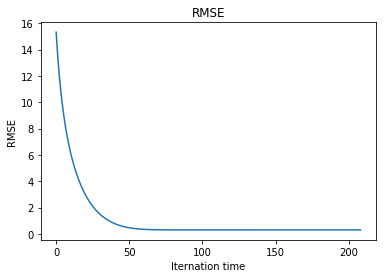

In [53]:
plt.plot(rmse)
plt.xlabel('Iternation time')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.show()

## 二 使用最小二乘法求解

function(ZuiXiaoErCheng)为最小二乘法  
X_input_train=np.concatenate((X_train,np.ones([70,1])),axis=1),将截距项放到X_train矩阵中。  
原本X_train是一个[70,1]的矩阵，加入截距后变成[70,2]，第一列是原本的数据，第二列都是1。

In [54]:
def ZuiXiaoErCheng(X,Y):
    tmp1=np.matmul(np.transpose(X),X)
    tmp1=np.linalg.pinv(tmp1)
    tmp2=np.matmul(np.transpose(X),Y)
    Weights=np.matmul(tmp1,tmp2)
    return Weights

n_train=np.size(X_train)
n_test=np.size(X_test)
# print(n_train,n_test)
X_input_train=np.concatenate((X_train,np.ones([70,1])),axis=1)
Weights=ZuiXiaoErCheng(X_input_train,Y_train)

X_input_test=np.concatenate((X_test,np.ones([30,1])),axis=1)
y_pre_EC=np.matmul(X_input_test,Weights)
rmse_ec=np.sqrt(np.mean(np.sum(np.square(Y_test-y_pre_EC))))
    
print('ZuiXiaoErCheng Weights:' + ' '+str(Weights[0]) + '  '+str(Weights[1]))
print('ZuiXiaoErCheng MSE:' + str(rmse_ec))

ZuiXiaoErCheng Weights: [3.00586736]  [1.99575467]
ZuiXiaoErCheng MSE:0.2986971865168408


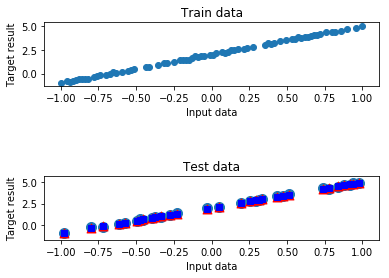

In [68]:
fig=plt.figure()
ax=fig.add_subplot(3,1,1)
ax.scatter(X_train,Y_train)
ax.set_xlabel('Input data')
ax.set_ylabel('Target result')
ax.set_title('Train data')

ax=fig.add_subplot(3,1,3)
ax.scatter(X_test,Y_test,s=100)
ax.scatter(X_test,y_pre_SGD,color='r',marker='^',s=80)
ax.scatter(X_test,y_pre_EC,color='b',marker='s')
ax.set_xlabel('Input data')
ax.set_ylabel('Target result')
ax.set_title('Test data')
plt.show()